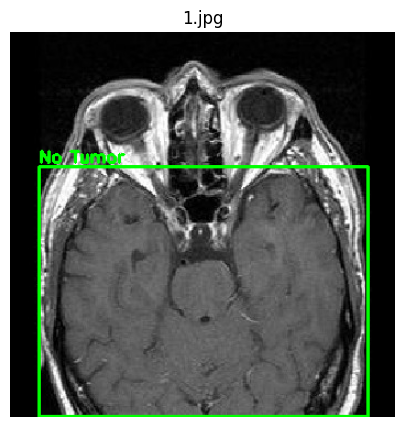

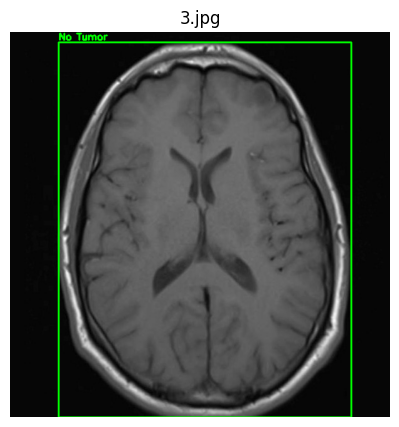

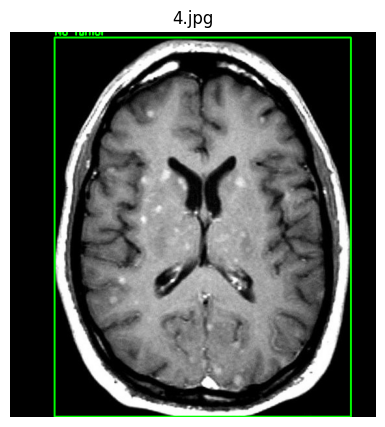

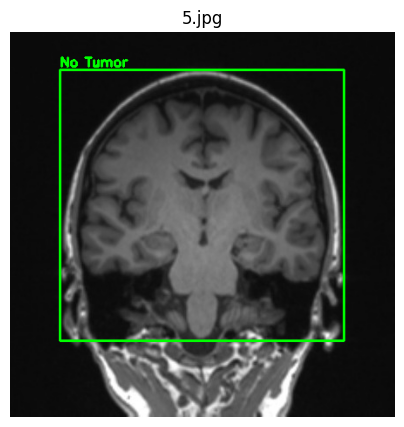

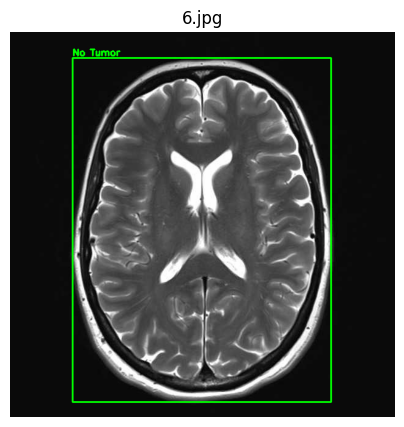

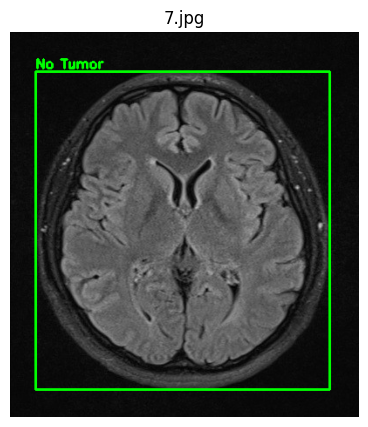

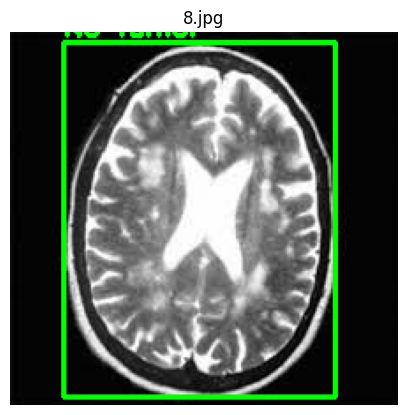

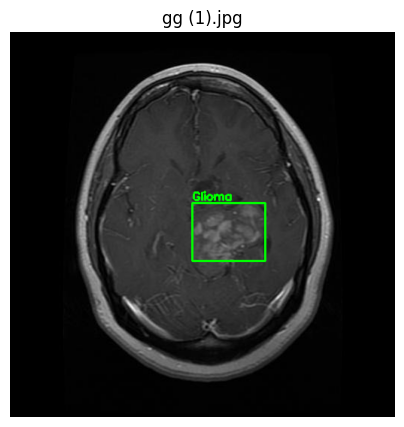

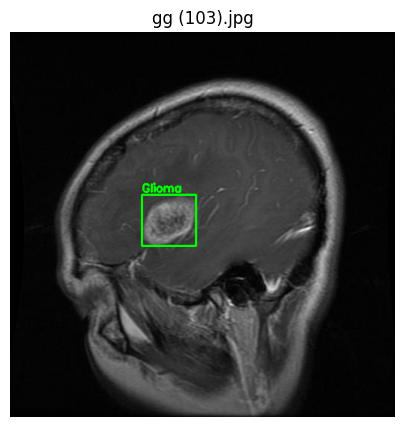

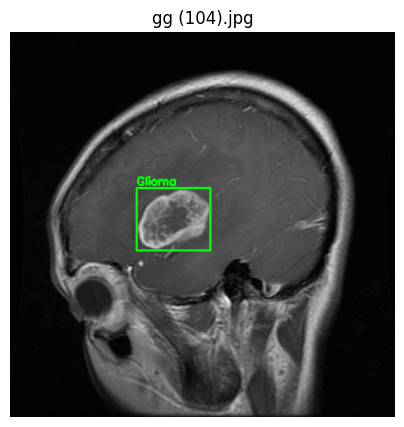

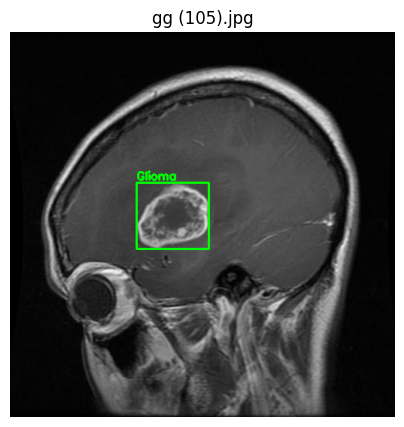

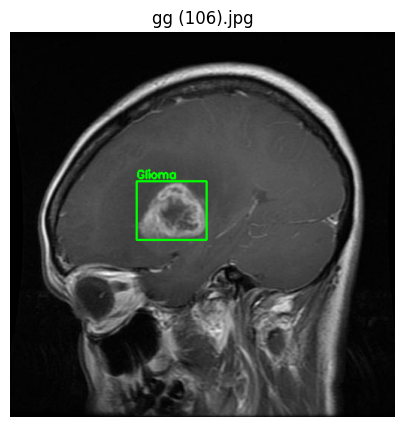

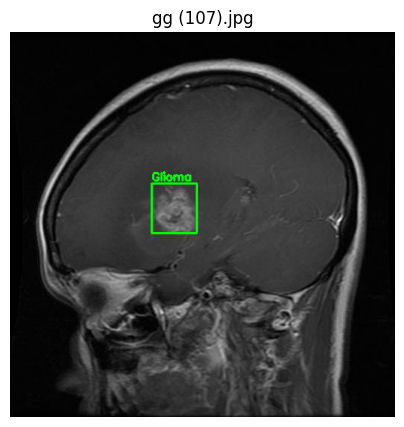

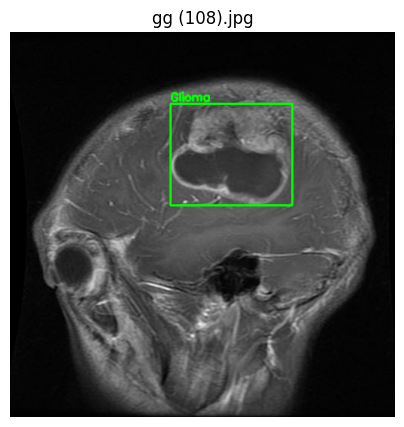

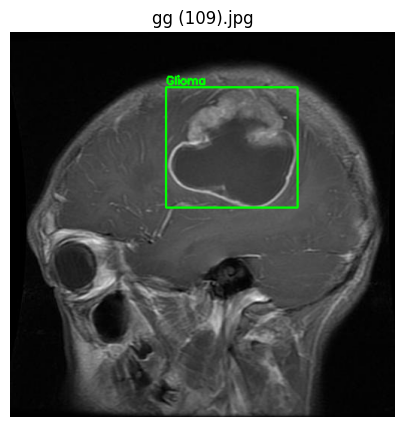

In [4]:
from pathlib import Path
import random, cv2
import matplotlib.pyplot as plt

classes = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]
root = Path("../data/data_yolo")

def draw_boxes(img_path, label_path):
    img = cv2.imread(str(img_path))
    h, w = img.shape[:2]
    with open(label_path) as f:
        for line in f:
            c, x, y, bw, bh = map(float, line.split())
            c = int(c)
            x1, y1 = int((x - bw/2)*w), int((y - bh/2)*h)
            x2, y2 = int((x + bw/2)*w), int((y + bh/2)*h)
            cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)
            cv2.putText(img, classes[c], (x1, y1-4), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

samples = list((root/"images"/"train").glob("*"))[:15]
for i, img_path in enumerate(samples):
    lbl = root/"labels"/"train"/f"{img_path.stem}.txt"
    if lbl.exists():
        plt.figure(figsize=(5,5))
        plt.imshow(draw_boxes(img_path, lbl))
        plt.title(img_path.name)
        plt.axis('off')
        plt.show()
